## Business Understanding

SyriaTel, a telecommunications company, is experiencing customer churn, where customers stop using their services. Customer churn leads to revenue loss and increased marketing costs, as acquiring new customers is more expensive than retaining existing ones.

The key stakeholder for this project is the **Customer Retention and Marketing Team**, whose goal is to reduce churn by identifying customers at risk of leaving and intervening early.

### Business Problem
Can we identify customers who are likely to churn soon, so SyriaTel can take preventative actions such as offering promotions, improving service, or providing personalized support?

### Objective
Build a machine learning classification model to predict customer churn and uncover patterns associated with customer departure.

### Why Machine Learning?
Customer churn is influenced by multiple interacting factors such as usage patterns, plan types, and customer service interactions. Machine learning allows us to identify complex patterns that traditional analysis may miss.


## Data Understanding

In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, f1_score, accuracy_score, recall_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay, )
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, roc_auc_score



In [3]:
# Load Data set
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# checking Misiing Values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

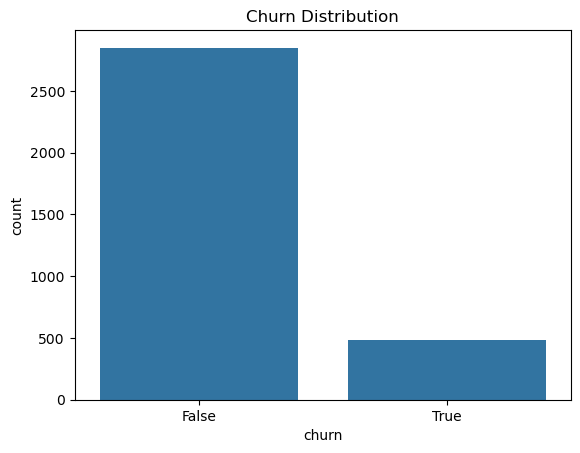

In [7]:
# Check class distribution
df['churn'].value_counts(normalize=True)

sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


The distribution shows the proportion of customers who churn versus those who remain. If churners are fewer, recall becomes more important than accuracy.


## Data Preparations

In [8]:
# Remove non-predictive column
df.drop(columns=['phone number'], inplace=True, errors='ignore')


In [9]:
# Convert Yes/No to numeric
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [10]:
# Separate Target and Features - dependent and independent variables
y = df['churn'].map({True: 1, False: 0})
X = df.drop(columns=['churn'])

In [11]:
#  encode state 
X = pd.get_dummies(X, columns=['state'], drop_first=True)

## Train-Test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Scaling

In [13]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling (Logistic Regression)

In [25]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Model Evaluation

In [26]:
y_pred = log_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7466266866566716
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       570
           1       0.33      0.70      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



#### Model Performance Interpretation
The model achieves 75% accuracy and performs well in identifying churn customers with 70% recall, meaning most churners are successfully detected. However, the low precision (33%) indicates many false positives.

For non-churn customers, the model performs strongly, with high precision (94%), showing reliable predictions for stable customers and an F1-score of 0.84, showing reliable predictions for stable customers.

Overall, the model is suitable when the goal is to minimize missed churn cases, though improvements are needed to reduce unnecessary retention efforts.



# Confusion Matrix

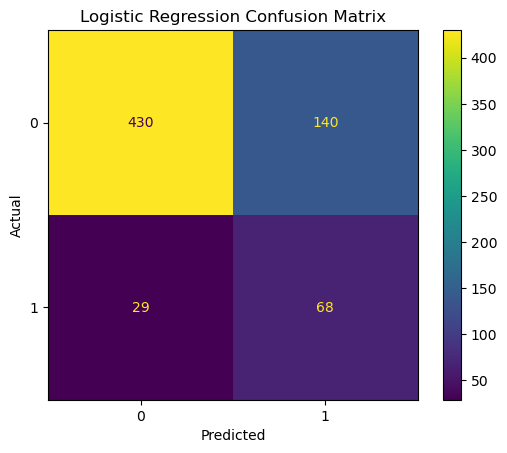

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[430, 140],
       [ 29,  68]])

- **True Positives (TP)** = 68
- **False Negatives (FN)** =29
- **True Negatives (TN)** = 430
- **False Positives (FP)** = 140


In [40]:
# # Visual comparison
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# # Confusion Matrix for Decision Tree
# ax1 = axes[0]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1, cmap='Blues')
# ax1.set_title('Decision Tree Confusion Matrix', fontweight='bold')

# ROC Curve

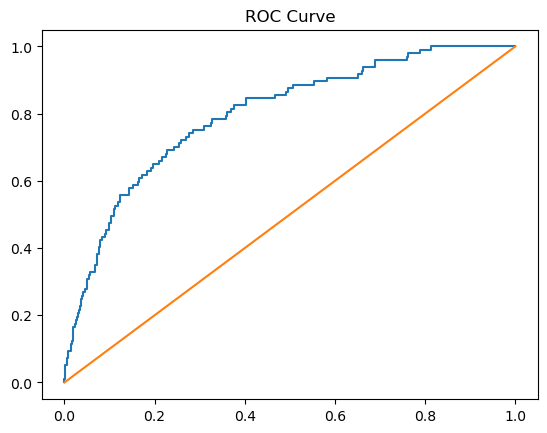

AUC: 0.79797431723639


In [35]:

y_prob = log_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.title("ROC Curve")
plt.show()

print("AUC:", roc_auc_score(y_test, y_prob))

# Feature Importance

In [36]:
coefficients = pd.Series(log_model.coef_[0], index=X.columns)
coefficients.sort_values(ascending=False).head(10)

customer service calls    0.851888
international plan        0.743048
number vmail messages     0.667578
total day minutes         0.338796
total day charge          0.337949
state_MT                  0.248425
state_CA                  0.202156
total eve minutes         0.191839
state_SC                  0.191572
total eve charge          0.190106
dtype: float64

## Business Interpretation & Conclusion
## Final Conclusion

The Logistic Regression model achieved strong overall accuracy but demonstrated lower recall for churn customers.

While the model performs well in identifying non-churn customers, it misses a significant portion of churn cases.

For business deployment, improving recall should be prioritized to minimize revenue loss.

The model provides actionable insights and forms a foundation for more advanced predictive models.